# Machine Learning Final Project 
# Team 5
# Adila Abdulwahid, Christopher Robinson, Tyler Wolff



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import random
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt
#from prettytable import PrettyTable
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Perceptron
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import model_selection

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from prettytable import PrettyTable
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression




In [2]:
bank = pd.read_csv(r"C:\Users\Chris\Desktop\504Project\bank\bank.csv",sep=';')
#bank = pd.read_csv("C:/Users/sheri/Desktop/projectbank.csv")

In [3]:
bank.shape

(4521, 17)

In [4]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
bank.dtypes
#There are numerical and categorical data. 

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [7]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
myTable = PrettyTable(["Variable", "Min", "Max", "Median", "mean"])

myTable.add_row(["age", bank["age"].min(), bank["age"].max(), bank["age"].median(), bank["age"].mean()])
myTable.add_row(["balance", bank["balance"].min(), bank["balance"].max(), bank["balance"].median(), bank["balance"].mean()])
myTable.add_row(["duration", bank["duration"].min(), bank["duration"].max(), bank["duration"].median(), bank["duration"].mean()])
myTable.add_row(["campaign", bank["campaign"].min(), bank["campaign"].max(), bank["campaign"].median(), bank["campaign"].mean()])
myTable.add_row(["pdays", bank["pdays"].min(), bank["pdays"].max(), bank["pdays"].median(), bank["pdays"].mean()])
myTable.add_row(["previous", bank["previous"].min(), bank["previous"].max(), bank["previous"].median(), bank["previous"].mean()])

print(myTable)



+----------+-------+-------+--------+--------------------+
| Variable |  Min  |  Max  | Median |        mean        |
+----------+-------+-------+--------+--------------------+
|   age    |   19  |   87  |  39.0  | 41.17009511170095  |
| balance  | -3313 | 71188 | 444.0  | 1422.6578190665782 |
| duration |   4   |  3025 | 185.0  | 263.96129174961294 |
| campaign |   1   |   50  |  2.0   | 2.793629727936297  |
|  pdays   |   -1  |  871  |  -1.0  | 39.766644547666445 |
| previous |   0   |   25  |  0.0   | 0.5425790754257908 |
+----------+-------+-------+--------+--------------------+


What simple models have you tried

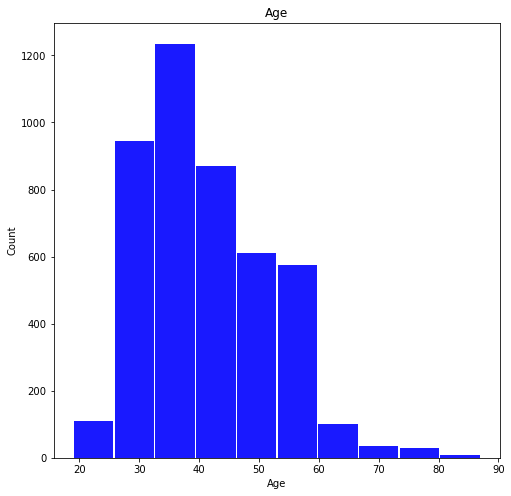

In [9]:
fig = plt.figure(figsize = (8,8)) 
plt.hist(bank['age'], color='blue', alpha=0.9, rwidth=.97) 
plt.title ('Age') 
plt.xlabel('Age')  
plt.ylabel('Count') 
plt.show() 

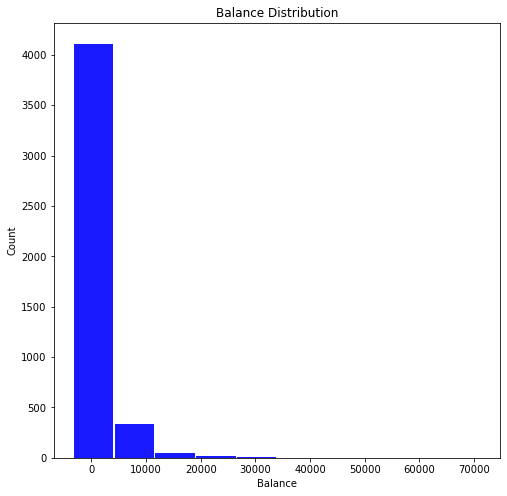

In [10]:
fig = plt.figure(figsize = (8,8)) 
plt.hist(bank['balance'], color='blue', alpha=0.9, rwidth=.97) 
plt.title ('Balance Distribution') 
plt.xlabel('Balance')  
plt.ylabel('Count') 
plt.show() 

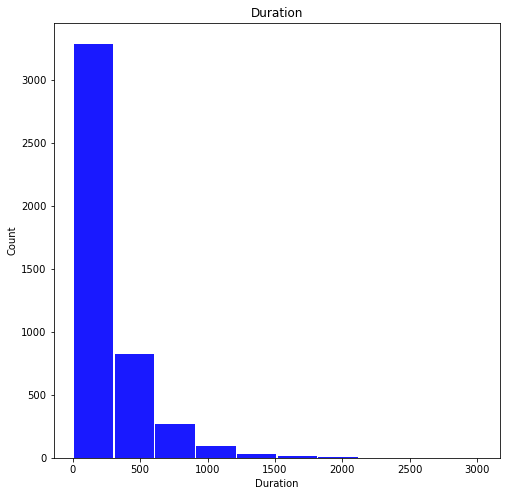

In [11]:
fig = plt.figure(figsize = (8,8)) 
plt.hist(bank['duration'], color='blue', alpha=0.9, rwidth=.97) 
plt.title ('Duration') 
plt.xlabel('Duration')  
plt.ylabel('Count') 
plt.show() 

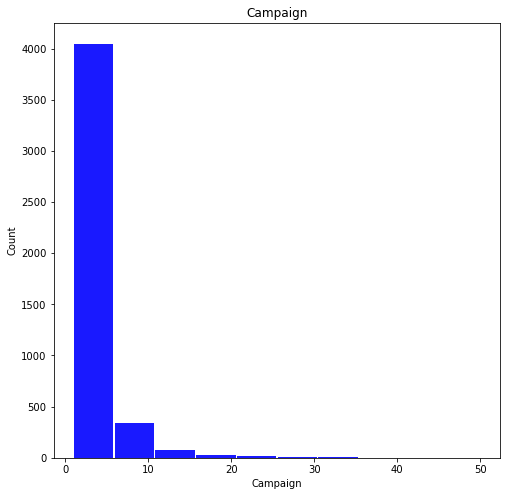

In [12]:
fig = plt.figure(figsize = (8,8)) 
plt.hist(bank['campaign'], color='blue', alpha=0.9, rwidth=.97) 
plt.title ('Campaign') 
plt.xlabel('Campaign')  
plt.ylabel('Count') 
plt.show() 

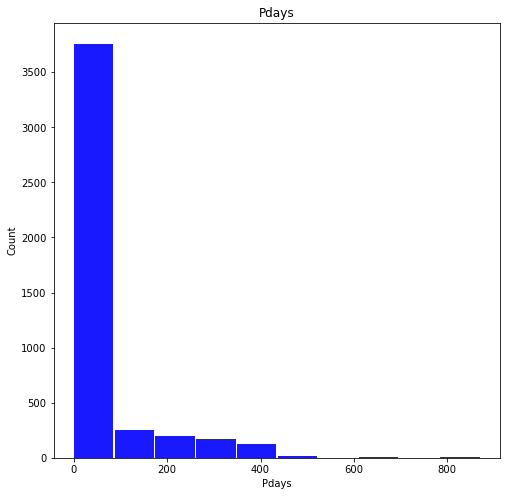

In [13]:
fig = plt.figure(figsize = (8,8)) 
plt.hist(bank['pdays'], color='blue', alpha=0.9, rwidth=.97) 
plt.title ('Pdays') 
plt.xlabel('Pdays')  
plt.ylabel('Count') 
plt.show() 

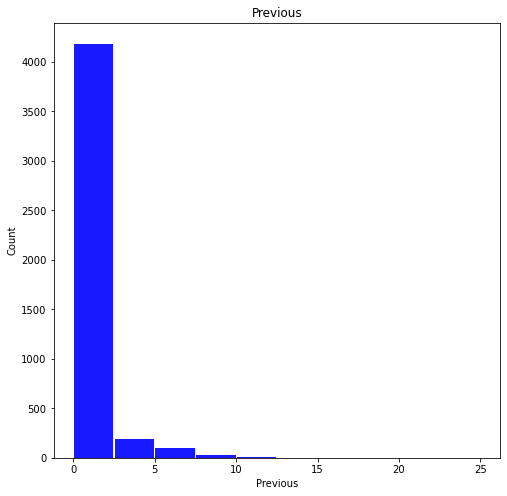

In [14]:
fig = plt.figure(figsize = (8,8)) 
plt.hist(bank['previous'], color='blue', alpha=0.9, rwidth=.97) 
plt.title ('Previous') 
plt.xlabel('Previous')  
plt.ylabel('Count') 
plt.show() 

Text(0, 0.5, 'Frequency')

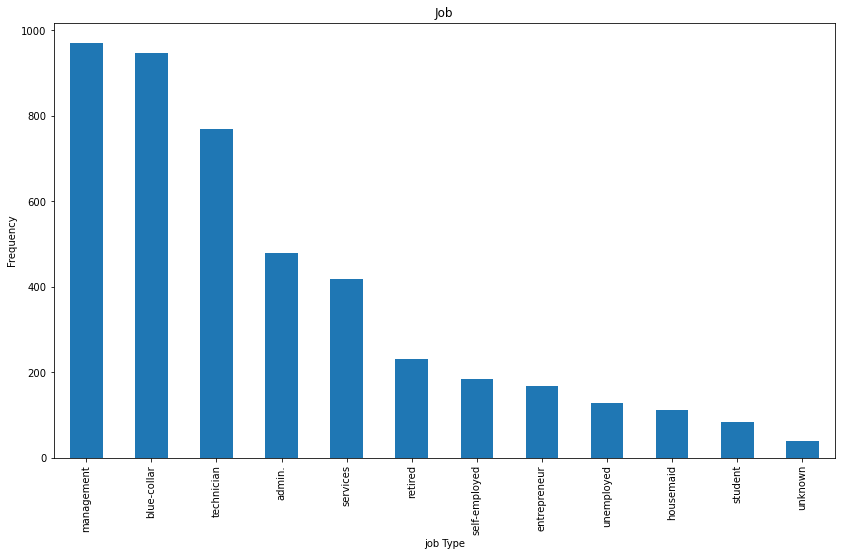

In [15]:
ax = bank['job'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Job")
ax.set_xlabel("job Type")
ax.set_ylabel("Frequency")


Text(0, 0.5, 'Frequency')

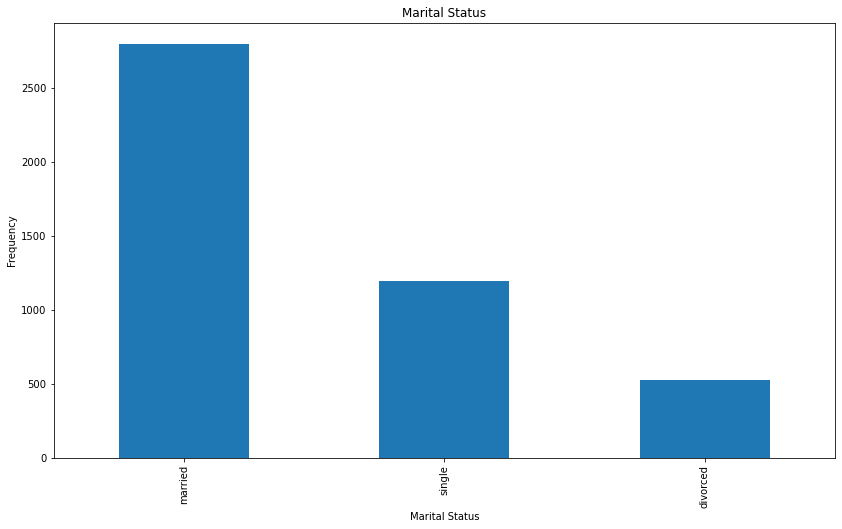

In [16]:
ax = bank['marital'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Marital Status")
ax.set_xlabel("Marital Status")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

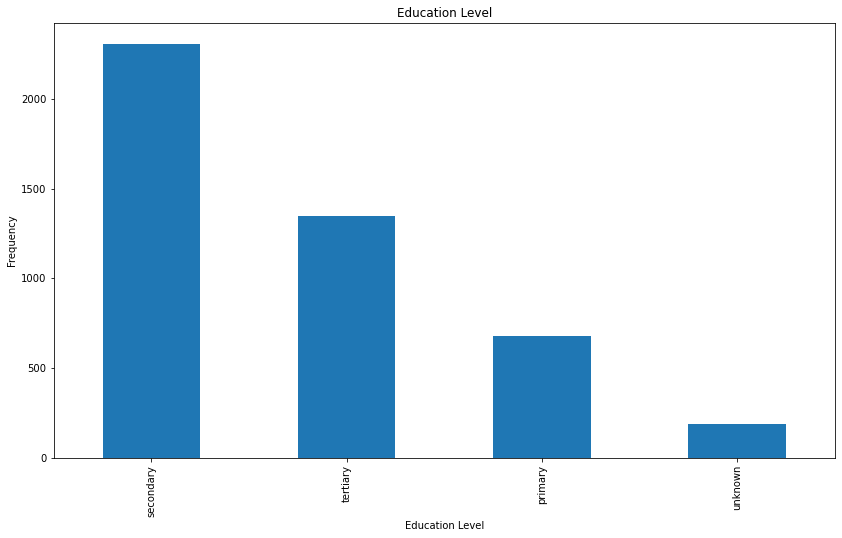

In [17]:
ax = bank['education'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Education Level")
ax.set_xlabel("Education Level")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

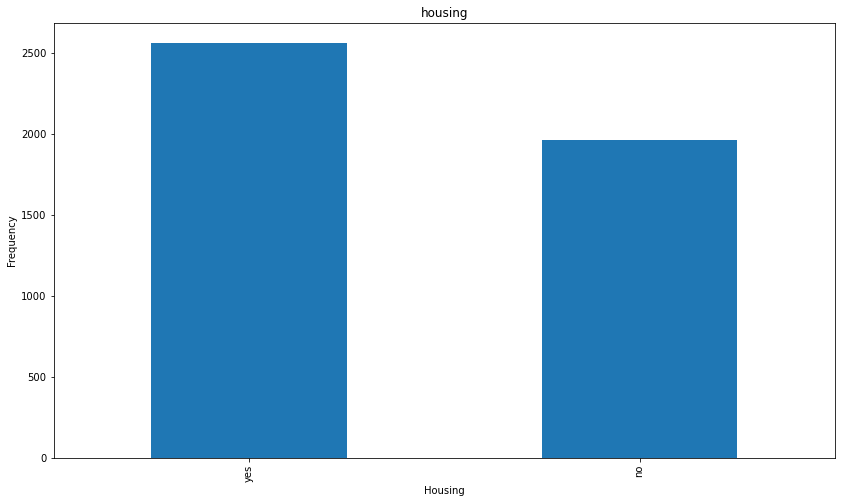

In [18]:
ax = bank['housing'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="housing")
ax.set_xlabel("Housing")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

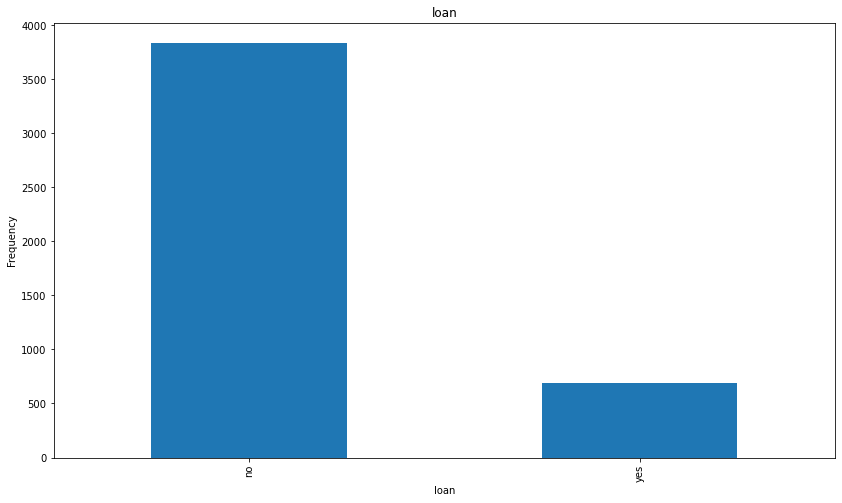

In [19]:
ax = bank['loan'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="loan")
ax.set_xlabel("loan")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

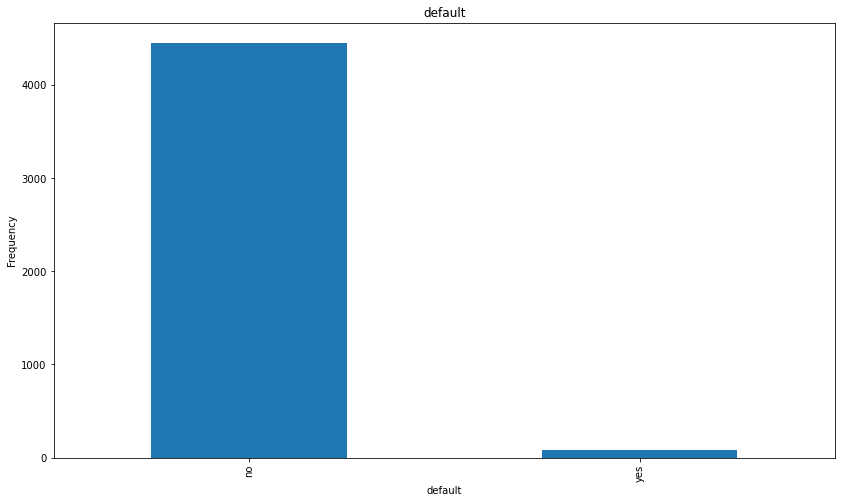

In [20]:
ax = bank['default'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="default")
ax.set_xlabel("default")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

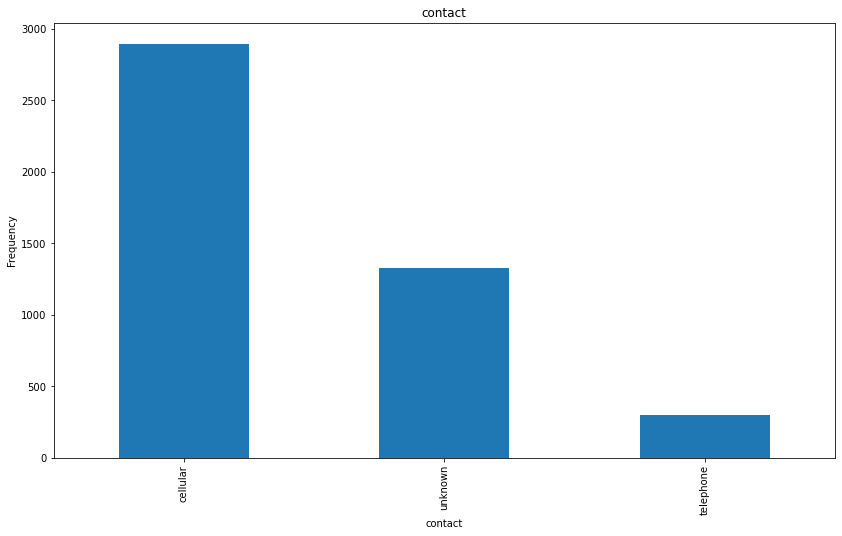

In [21]:
ax = bank['contact'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="contact")
ax.set_xlabel("contact")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

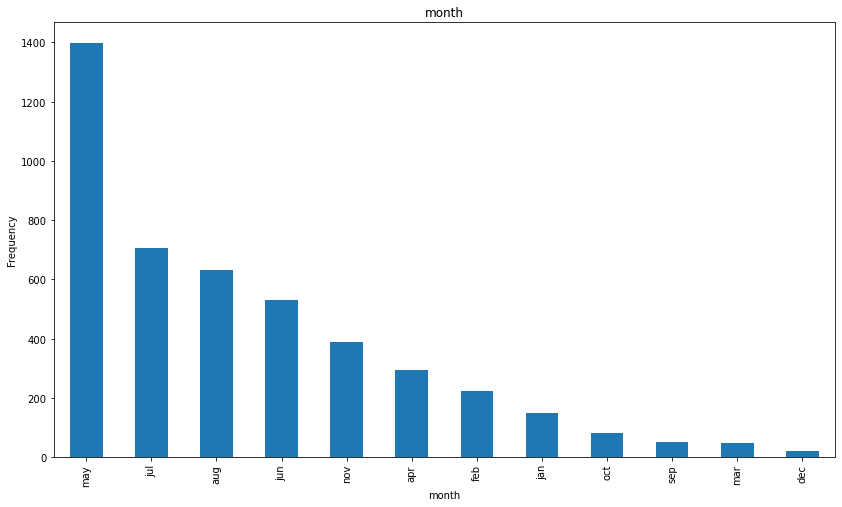

In [22]:
ax = bank['month'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="month")
ax.set_xlabel("month")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

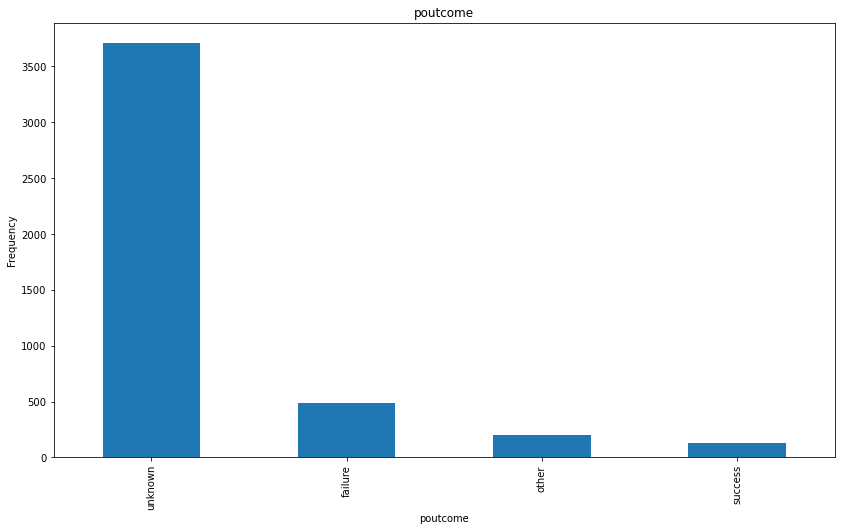

In [23]:
ax = bank['poutcome'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="poutcome")
ax.set_xlabel("poutcome")
ax.set_ylabel("Frequency")

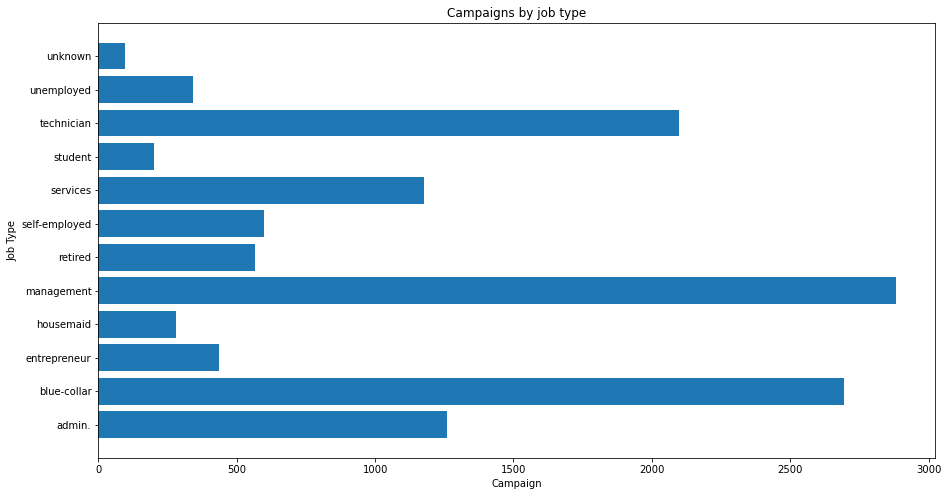

In [24]:
campaignByjob = bank.groupby('job', as_index=False)['campaign'].sum()

fig = plt.figure(figsize = (15,8)) 
plt.barh(campaignByjob['job'], campaignByjob['campaign']) 
plt.xlabel("Campaign") 
plt.ylabel("Job Type") 
plt.title("Campaigns by job type") 
plt.show() 

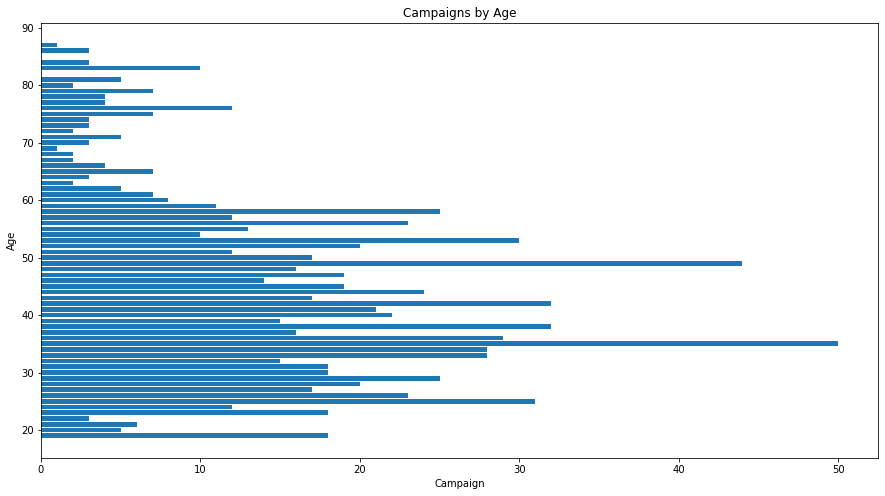

In [25]:
#campaignByAge = bank.groupby('age', as_index=False)['campaign'].sum()

fig = plt.figure(figsize = (15,8)) 
plt.barh(bank['age'], bank['campaign']) 
plt.xlabel("Campaign") 
plt.ylabel("Age") 
plt.title("Campaigns by Age") 
plt.show() 

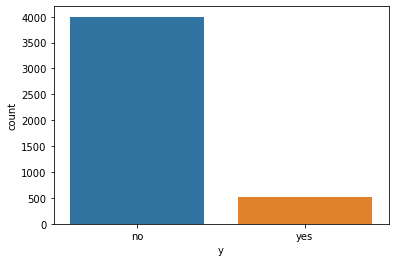

In [26]:
ax = sns.countplot(x = bank["y"])  #Imbalanced dataset
plt.show()

 categorical variables = ["job", "marital", "education", "default", "housing", "loan", "contact", "day", "month",
                  "poutcome"]
                  
                  
 numerical variables = ["age", "balance", "duration", "campaign", "pdays", "previous"]
 

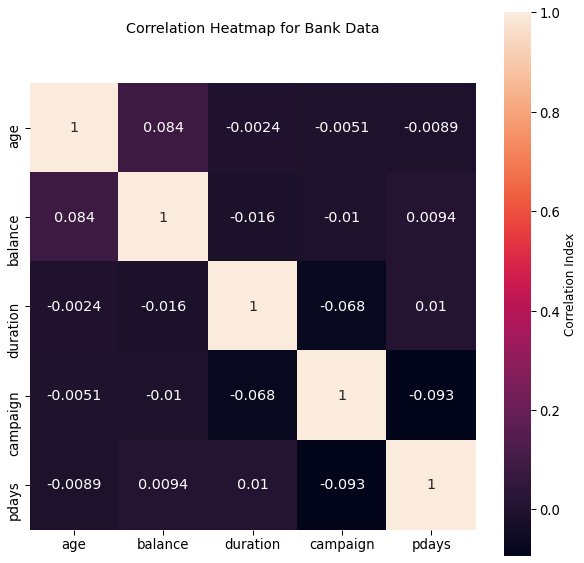

In [27]:
heatmap = bank[['age','balance','duration','campaign','pdays']] 
sns.set_context("paper", rc={"axes.labelsize":12}, font_scale = 1.5) 
correlations = heatmap.corr() 
plt.figure(figsize = (10,10)) 

ax = sns.heatmap(correlations[['age','balance','duration','campaign','pdays']],  
annot = True, square = True, cbar_kws={'label': 'Correlation Index'}) 
ax.set_title('Correlation Heatmap for Bank Data') 
ax.set_ylim(len(correlations), -0.5) 
plt.show() 

In [28]:
labels = bank['y']
#print(labels)

In [29]:
variables = ["age", "balance", "duration", "campaign", "pdays", "previous"]

subBankData = pd.DataFrame()

subBankData[variables] = bank[variables].apply(pd.to_numeric, errors='coerce')

In [30]:
cat_feat = ["job", "marital", "education", "default", "housing", "loan", "contact", "day", "month", "poutcome"]
cat_featdf = pd.DataFrame()

cat_featdf[cat_feat] = bank[cat_feat]

cat_featdf.fillna('0', inplace=True)

#print(cat_featdf)

In [32]:
cat_featdf

,job,marital,education,default,housing,loan,contact,day,month,poutcome
0,unemployed,married,primary,no,no,no,cellular,19,oct,unknown
1,services,married,secondary,no,yes,yes,cellular,11,may,failure
2,management,single,tertiary,no,yes,no,cellular,16,apr,failure
3,management,married,tertiary,no,yes,yes,unknown,3,jun,unknown
4,blue-collar,married,secondary,no,yes,no,unknown,5,may,unknown
...,...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,30,jul,unknown
4517,self-employed,married,tertiary,yes,yes,yes,unknown,9,may,unknown
4518,technician,married,secondary,no,no,no,cellular,19,aug,unknown
4519,blue-collar,married,secondary,no,no,no,cellular,6,feb,other


In [33]:
enc = OneHotEncoder(sparse='False')
transformed = enc.fit(cat_featdf)

In [34]:
X = cat_featdf
y = labels


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [35]:
balanced_model = make_pipeline(enc,Perceptron(class_weight='balanced'))
unbalanced_model = make_pipeline(enc,Perceptron())

In [36]:
balanced_model = balanced_model.fit(X_train,y_train)
unbalanced_model = unbalanced_model.fit(X_train,y_train)

In [37]:
predBal = balanced_model.predict(X_test)
predUnbal = unbalanced_model.predict(X_test)

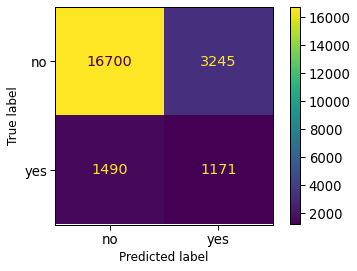

In [41]:
plot_confusion_matrix(balanced_model,X_test,y_test)

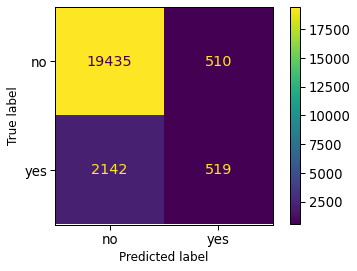

In [42]:
plot_confusion_matrix(unbalanced_model,X_test,y_test)

In [43]:
print(classification_report(y_test,predBal))

              precision    recall  f1-score   support

          no       0.92      0.84      0.88     19945
         yes       0.27      0.44      0.33      2661

    accuracy                           0.79     22606
   macro avg       0.59      0.64      0.60     22606
weighted avg       0.84      0.79      0.81     22606



In [44]:
print(classification_report(y_test,predUnbal))

              precision    recall  f1-score   support

          no       0.90      0.97      0.94     19945
         yes       0.50      0.20      0.28      2661

    accuracy                           0.88     22606
   macro avg       0.70      0.58      0.61     22606
weighted avg       0.85      0.88      0.86     22606



In [51]:
variables = ["age", "balance", "duration", "campaign", "pdays", "previous"]

subBankData = pd.DataFrame()

subBankData[variables] = bank[variables].apply(pd.to_numeric, errors='coerce') 

In [53]:
enc = OneHotEncoder(handle_unknown='ignore',sparse='False')
enc.fit(subBankData)

X = subBankData
y = labels


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

[0.83977901 0.83738938 0.8130531  0.8539823  0.85619469]
[0.83093923 0.83849558 0.85176991 0.85730088 0.84402655]


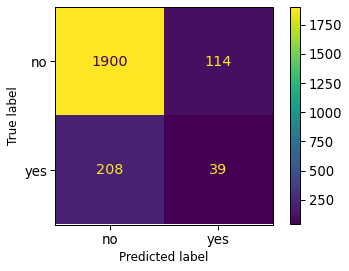

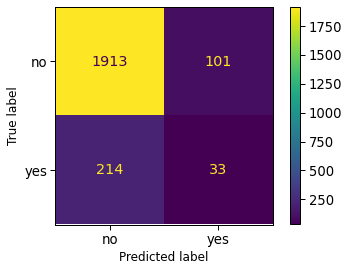

In [54]:
numBalanced_model = make_pipeline(enc,Perceptron(class_weight='balanced'))
numUnbalanced_model = make_pipeline(enc,Perceptron())

numBalanced_model = numBalanced_model.fit(X_train,y_train)
numUnbalanced_model = numUnbalanced_model.fit(X_train,y_train)

predNumBal = numBalanced_model.predict(X_test)
predNumUnbal = numUnbalanced_model.predict(X_test)

plot_confusion_matrix(numBalanced_model,X_test,y_test)
plot_confusion_matrix(numUnbalanced_model,X_test,y_test)

scores1 = cross_val_score(numBalanced_model, X, y, cv=5,scoring='accuracy') 
scores2 = cross_val_score(numUnbalanced_model, X, y, cv=5,scoring='accuracy') 

print(scores1)
print(scores2)

# PCA

In [67]:
bank2 = pd.read_csv(r"C:\Users\Chris\Desktop\504Project\bank\bank.csv",sep=';')
df = bank2
objfeatures = df.select_dtypes(include="object").columns
le = LabelEncoder()

for feat in objfeatures:
    df[feat] = le.fit_transform(df[feat].astype(str))
X = df.drop('y', 1)
y = df['y']

X = StandardScaler().fit_transform(X.astype(int))

In [68]:
from sklearn.decomposition import PCA
std = StandardScaler()
transformed = StandardScaler().fit_transform(df)

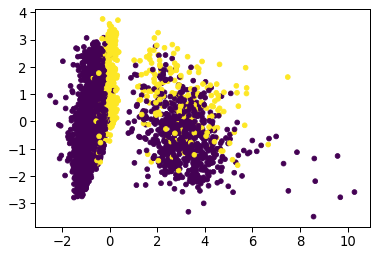

In [69]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=2)
pca.fit(transformed)
x_std = pca.transform(transformed)
plt.figure()
plt.scatter(x_std[:, 0], x_std[:, 1], c=y)

# Decision Tree 

In [70]:
short_tree = tree.DecisionTreeClassifier(max_depth = 3)
short_tree = short_tree.fit(X_train, y_train)
y_pred = short_tree.predict(X_test)
print('accuracy %2.2f ' % accuracy_score(y_test,y_pred))



accuracy 0.89 


## Since the data is imbalanced f1 score or auc is a better metric to compare models

In [71]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
depths = []
accs = []
trainaccuracy = []
f1_train = []
f1_test = []
auc_train = []
auc_test = []
for i in range(3, 11):
    short_tree = tree.DecisionTreeClassifier(max_depth = i)
    short_tree = short_tree.fit(X_train, y_train)
    y_pred = short_tree.predict(X_test)
    y_prob = short_tree.predict_proba(X_test)[:,1]
    acc = accuracy_score(y_test, y_pred)
    train_pred = short_tree.predict(X_train)
    train_prob = short_tree.predict_proba(X_train)[:,1]
    auc_train.append(roc_auc_score(y_train, train_prob))
    auc_test.append(roc_auc_score(y_test, y_prob))
    f1_train.append(f1_score(y_train, train_pred))
    f1_test.append(f1_score(y_test, y_pred))
    trainacc = accuracy_score(y_train, train_pred)
    depths.append(i)
    accs.append(1-acc)
    trainaccuracy.append(1-trainacc)

    plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.plot(depths,trainaccuracy, label = "train")
plt.plot(depths, accs, label = "test")
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.legend()

plt.subplot(1,3,2)
plt.plot(depths,f1_train, label = "train")
plt.plot(depths, f1_test, label = "test")
plt.xlabel('Max Depth')
plt.ylabel('F1-Score')
plt.legend()


plt.subplot(1,3,3)
plt.plot(depths,auc_train, label = "train")
plt.plot(depths, auc_test, label = "test")
plt.xlabel('Max Depth')
plt.ylabel('AUC Score')
plt.legend()

plt.show()

ValueError: pos_label=1 is not a valid label: array(['no', 'yes'], dtype='<U3')

In [60]:
pd.DataFrame({'Depth': depths, 'Train_Error': trainaccuracy, 'Test_Error': accs,
             'Train_F1': f1_train, 'Test_F1': f1_test, 'Train_AUC': auc_train, 'Test_AUC': auc_test})

#F1 score 

ValueError: arrays must all be same length

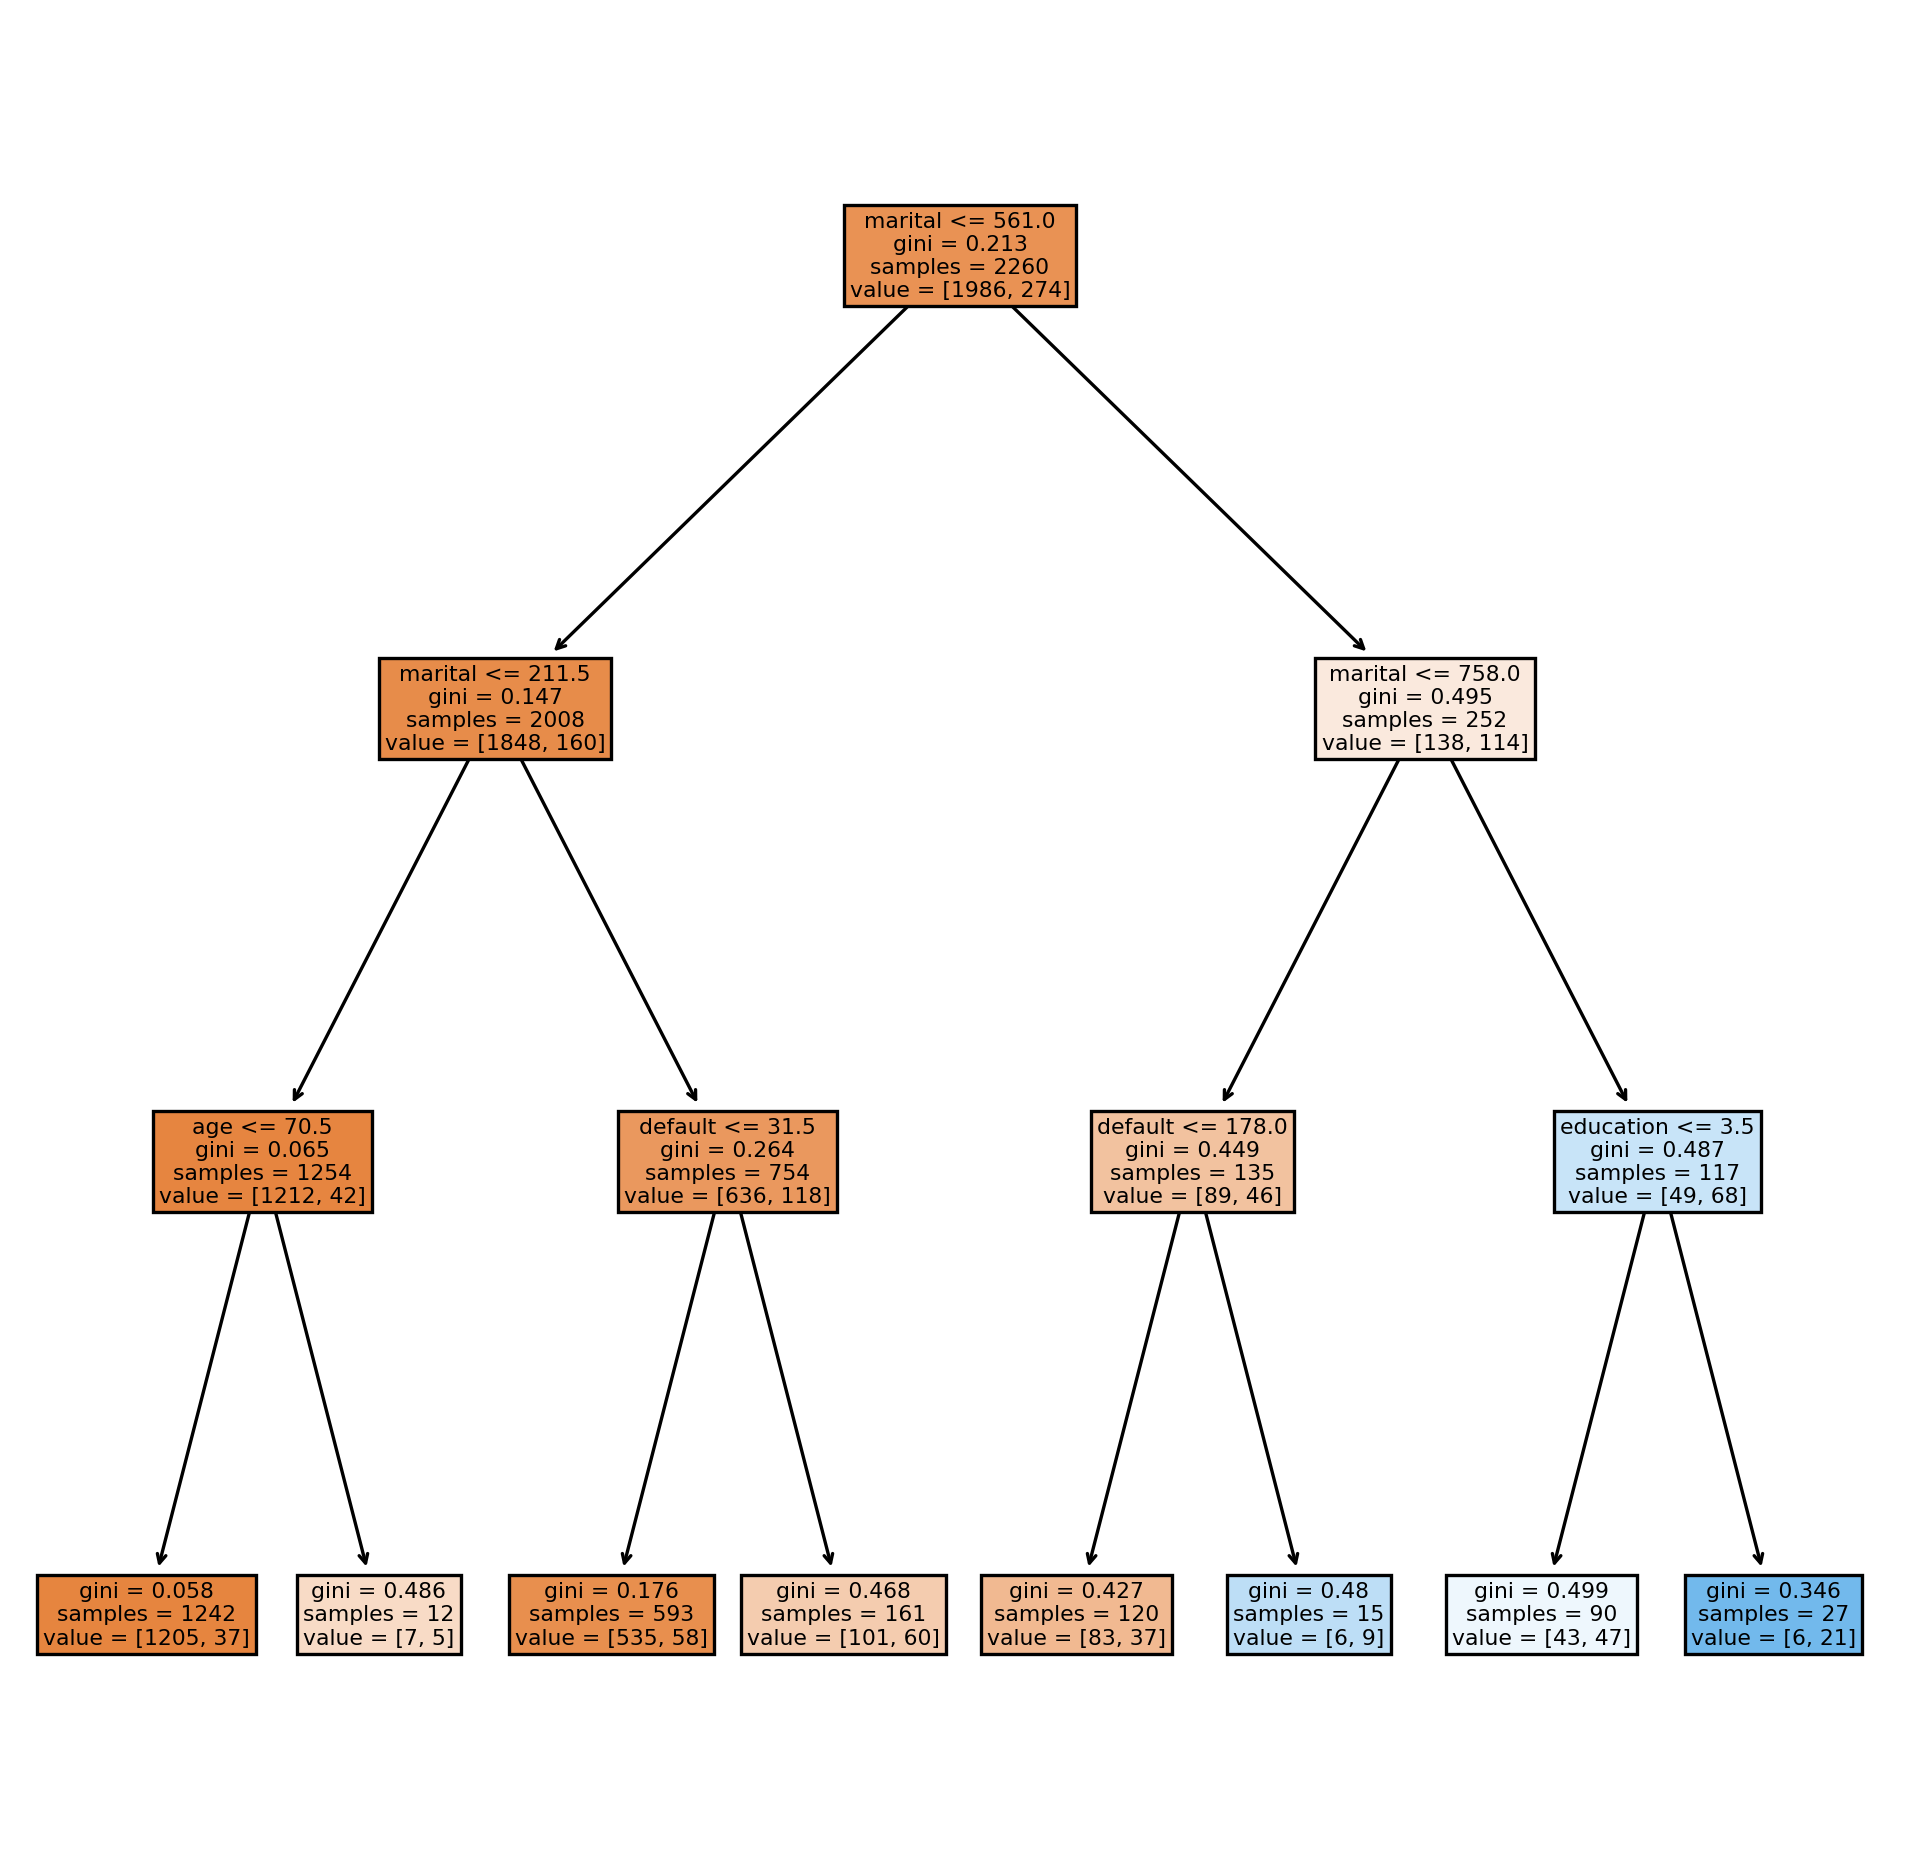

In [61]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=300)
short_tree = tree.DecisionTreeClassifier(max_depth = 3)
short_tree = short_tree.fit(X_train, y_train)
tree.plot_tree(short_tree, filled=True, feature_names=df.drop(columns='y').columns);

# Perceptron 


In [62]:
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
print("Acc:", clf.score(X_test, y_test))

Acc: 0.8292790800530738


# Logistic Regression 

In [63]:
alphas = []
accs = []
trainaccuracy = []
f1_train = []
f1_test = []
auc_train = []
auc_test = []
for i in 10.0**np.arange(-7,2):
    clf = LogisticRegression(random_state=0,C=i,penalty='l2',  )
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:,1]
    acc = accuracy_score(y_test, y_pred)
    train_pred = clf.predict(X_train)
    train_prob = clf.predict_proba(X_train)[:,1]
    auc_train.append(roc_auc_score(y_train, train_prob))
    auc_test.append(roc_auc_score(y_test, y_prob))
    f1_train.append(f1_score(y_train, train_pred))
    f1_test.append(f1_score(y_test, y_pred))
    trainacc = accuracy_score(y_train, train_pred)
    alphas.append(i)
    accs.append(1-acc)
    trainaccuracy.append(1-trainacc)


ValueError: pos_label=1 is not a valid label: array(['no', 'yes'], dtype='<U3')

In [64]:
pd.DataFrame({'alpha': alphas, 'Train_Error': trainaccuracy, 'Test_Error': accs,
             'Train_F1': f1_train, 'Test_F1': f1_test, 'Train_AUC': auc_train, 'Test_AUC': auc_test})

#F1 score 

ValueError: arrays must all be same length

ValueError: x and y must have same first dimension, but have shapes (0,) and (1,)

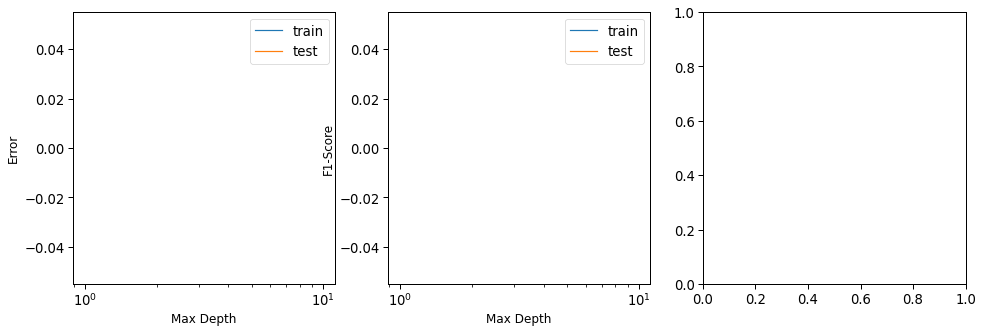

In [65]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.plot(alphas,trainaccuracy, label = "train")
plt.plot(alphas, accs, label = "test")
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.legend()
plt.xscale('log')

plt.subplot(1,3,2)
plt.plot(alphas,f1_train, label = "train")
plt.plot(alphas, f1_test, label = "test")
plt.xlabel('Max Depth')
plt.ylabel('F1-Score')
plt.legend()
plt.xscale('log')

plt.subplot(1,3,3)
plt.plot(alphas,auc_train, label = "train")
plt.plot(alphas, auc_test, label = "test")
plt.xlabel('Max Depth')
plt.ylabel('AUC Score')
plt.legend()
plt.xscale('log')

plt.show()  

# SVM

In [ ]:
clf = svm.SVC(kernel='linear') 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score of SVM -\t",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

In [ ]:
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
lr = LogisticRegression()

dt.fit(X_train,y_train)
knn.fit(X_train,y_train)
lr.fit(X_train,y_train)

dt_score=dt.score(X_test,y_test)
knn_score=knn.score(X_test,y_test)
lr_score=lr.score(X_test,y_test)

print("Accuracy Score of Decision Tree -\t",dt_score )
print("Accuracy Score of KNN  -\t",knn_score )
print("Accuracy Score of Logistic Regression -\t",lr_score )

# Gradient Boost 

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
gbclf = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.1, random_state=42)
gb.fit = gbclf.fit(X_train, y_train)

pred_GB =gbclf.predict(X_test)
gb_score = accuracy_score(y_test, pred_GB)

print('Accuracy score of GradientBoost Classifier -\t', gb_score)




NameError: name 'gb' is not defined

In [ ]:
#The gradient boost improved our model accuracy. 

# # Comparison of Models Accuarcy with BoxPlot

 The accuaracies below do not match what was above. Not sure why or how, but I do like the ability to compare the models on the boxplot


In [ ]:
from sklearn.svm import SVC
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


In [ ]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


In [ ]:


fig = plt.figure()
fig.suptitle('Algorithm Accuaracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# # Feature Selection (Logistic Regression)

model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
